<a href="https://colab.research.google.com/github/batu-el/l65_be301_dc755/blob/main/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorboardX torch_geometric

In [2]:
### Synthetic Data ###

"""synthetic_structsim.py

    Utilities for generating certain graph shapes.
"""
import math

import networkx as nx
import numpy as np

# Following GraphWave's representation of structural similarity

def clique(start, nb_nodes, nb_to_remove=0, role_start=0):
    """ Defines a clique (complete graph on nb_nodes nodes,
    with nb_to_remove  edges that will have to be removed),
    index of nodes starting at start
    and role_ids at role_start
    INPUT:
    -------------
    start       :    starting index for the shape
    nb_nodes    :    int correspondingraph to the nb of nodes in the clique
    role_start  :    starting index for the roles
    nb_to_remove:    int-- numb of edges to remove (unif at RDM)
    OUTPUT:
    -------------
    graph       :    a house shape graph, with ids beginning at start
    roles       :    list of the roles of the nodes (indexed starting at
                     role_start)
    """
    a = np.ones((nb_nodes, nb_nodes))
    np.fill_diagonal(a, 0)
    graph = nx.from_numpy_matrix(a)
    edge_list = graph.edges().keys()
    roles = [role_start] * nb_nodes
    if nb_to_remove > 0:
        lst = np.random.choice(len(edge_list), nb_to_remove, replace=False)
        print(edge_list, lst)
        to_delete = [edge_list[e] for e in lst]
        graph.remove_edges_from(to_delete)
        for e in lst:
            print(edge_list[e][0])
            print(len(roles))
            roles[edge_list[e][0]] += 1
            roles[edge_list[e][1]] += 1
    mapping_graph = {k: (k + start) for k in range(nb_nodes)}
    graph = nx.relabel_nodes(graph, mapping_graph)
    return graph, roles


def cycle(start, len_cycle, role_start=0):
    """Builds a cycle graph, with index of nodes starting at start
    and role_ids at role_start
    INPUT:
    -------------
    start       :    starting index for the shape
    role_start  :    starting index for the roles
    OUTPUT:
    -------------
    graph       :    a house shape graph, with ids beginning at start
    roles       :    list of the roles of the nodes (indexed starting at
                     role_start)
    """
    graph = nx.Graph()
    graph.add_nodes_from(range(start, start + len_cycle))
    for i in range(len_cycle - 1):
        graph.add_edges_from([(start + i, start + i + 1)])
    graph.add_edges_from([(start + len_cycle - 1, start)])
    roles = [role_start] * len_cycle
    return graph, roles


def diamond(start, role_start=0):
    """Builds a diamond graph, with index of nodes starting at start
    and role_ids at role_start
    INPUT:
    -------------
    start       :    starting index for the shape
    role_start  :    starting index for the roles
    OUTPUT:
    -------------
    graph       :    a house shape graph, with ids beginning at start
    roles       :    list of the roles of the nodes (indexed starting at
                     role_start)
    """
    graph = nx.Graph()
    graph.add_nodes_from(range(start, start + 6))
    graph.add_edges_from(
        [
            (start, start + 1),
            (start + 1, start + 2),
            (start + 2, start + 3),
            (start + 3, start),
        ]
    )
    graph.add_edges_from(
        [
            (start + 4, start),
            (start + 4, start + 1),
            (start + 4, start + 2),
            (start + 4, start + 3),
        ]
    )
    graph.add_edges_from(
        [
            (start + 5, start),
            (start + 5, start + 1),
            (start + 5, start + 2),
            (start + 5, start + 3),
        ]
    )
    roles = [role_start] * 6
    return graph, roles


def tree(start, height, r=2, role_start=0):
    """Builds a balanced r-tree of height h
    INPUT:
    -------------
    start       :    starting index for the shape
    height      :    int height of the tree
    r           :    int number of branches per node
    role_start  :    starting index for the roles
    OUTPUT:
    -------------
    graph       :    a tree shape graph, with ids beginning at start
    roles       :    list of the roles of the nodes (indexed starting at role_start)
    """
    graph = nx.balanced_tree(r, height)
    roles = [0] * graph.number_of_nodes()
    return graph, roles


def fan(start, nb_branches, role_start=0):
    """Builds a fan-like graph, with index of nodes starting at start
    and role_ids at role_start
    INPUT:
    -------------
    nb_branches :    int correspondingraph to the nb of fan branches
    start       :    starting index for the shape
    role_start  :    starting index for the roles
    OUTPUT:
    -------------
    graph       :    a house shape graph, with ids beginning at start
    roles       :    list of the roles of the nodes (indexed starting at
                     role_start)
    """
    graph, roles = star(start, nb_branches, role_start=role_start)
    for k in range(1, nb_branches - 1):
        roles[k] += 1
        roles[k + 1] += 1
        graph.add_edges_from([(start + k, start + k + 1)])
    return graph, roles


def ba(start, width, role_start=0, m=5):
    """Builds a BA preferential attachment graph, with index of nodes starting at start
    and role_ids at role_start
    INPUT:
    -------------
    start       :    starting index for the shape
    width       :    int size of the graph
    role_start  :    starting index for the roles
    OUTPUT:
    -------------
    graph       :    a house shape graph, with ids beginning at start
    roles       :    list of the roles of the nodes (indexed starting at
                     role_start)
    """
    graph = nx.barabasi_albert_graph(width, m)
    graph.add_nodes_from(range(start, start + width))
    nids = sorted(graph)
    mapping = {nid: start + i for i, nid in enumerate(nids)}
    graph = nx.relabel_nodes(graph, mapping)
    roles = [role_start for i in range(width)]
    return graph, roles


def house(start, role_start=0):
    """Builds a house-like  graph, with index of nodes starting at start
    and role_ids at role_start
    INPUT:
    -------------
    start       :    starting index for the shape
    role_start  :    starting index for the roles
    OUTPUT:
    -------------
    graph       :    a house shape graph, with ids beginning at start
    roles       :    list of the roles of the nodes (indexed starting at
                     role_start)
    """
    graph = nx.Graph()
    graph.add_nodes_from(range(start, start + 5))
    graph.add_edges_from(
        [
            (start, start + 1),
            (start + 1, start + 2),
            (start + 2, start + 3),
            (start + 3, start),
        ]
    )
    # graph.add_edges_from([(start, start + 2), (start + 1, start + 3)])
    graph.add_edges_from([(start + 4, start), (start + 4, start + 1)])
    roles = [role_start, role_start, role_start + 1, role_start + 1, role_start + 2]
    return graph, roles


def grid(start, dim=2, role_start=0):
    """ Builds a 2by2 grid
    """
    grid_G = nx.grid_graph([dim, dim])
    grid_G = nx.convert_node_labels_to_integers(grid_G, first_label=start)
    roles = [role_start for i in grid_G.nodes()]
    return grid_G, roles


def star(start, nb_branches, role_start=0):
    """Builds a star graph, with index of nodes starting at start
    and role_ids at role_start
    INPUT:
    -------------
    nb_branches :    int correspondingraph to the nb of star branches
    start       :    starting index for the shape
    role_start  :    starting index for the roles
    OUTPUT:
    -------------
    graph       :    a house shape graph, with ids beginning at start
    roles       :    list of the roles of the nodes (indexed starting at
                     role_start)
    """
    graph = nx.Graph()
    graph.add_nodes_from(range(start, start + nb_branches + 1))
    for k in range(1, nb_branches + 1):
        graph.add_edges_from([(start, start + k)])
    roles = [role_start + 1] * (nb_branches + 1)
    roles[0] = role_start
    return graph, roles


def path(start, width, role_start=0):
    """Builds a path graph, with index of nodes starting at start
    and role_ids at role_start
    INPUT:
    -------------
    start       :    starting index for the shape
    width       :    int length of the path
    role_start  :    starting index for the roles
    OUTPUT:
    -------------
    graph       :    a house shape graph, with ids beginning at start
    roles       :    list of the roles of the nodes (indexed starting at
                     role_start)
    """
    graph = nx.Graph()
    graph.add_nodes_from(range(start, start + width))
    for i in range(width - 1):
        graph.add_edges_from([(start + i, start + i + 1)])
    roles = [role_start] * width
    roles[0] = role_start + 1
    roles[-1] = role_start + 1
    return graph, roles


def build_graph(
    width_basis,
    basis_type,
    list_shapes,
    start=0,
    rdm_basis_plugins=False,
    add_random_edges=0,
    m=5,
):
    """This function creates a basis (scale-free, path, or cycle)
    and attaches elements of the type in the list randomly along the basis.
    Possibility to add random edges afterwards.
    INPUT:
    --------------------------------------------------------------------------------------
    width_basis      :      width (in terms of number of nodes) of the basis
    basis_type       :      (torus, string, or cycle)
    shapes           :      list of shape list (1st arg: type of shape,
                            next args:args for building the shape,
                            except for the start)
    start            :      initial nb for the first node
    rdm_basis_plugins:      boolean. Should the shapes be randomly placed
                            along the basis (True) or regularly (False)?
    add_random_edges :      nb of edges to randomly add on the structure
    m                :      number of edges to attach to existing node (for BA graph)
    OUTPUT:
    --------------------------------------------------------------------------------------
    basis            :      a nx graph with the particular shape
    role_ids         :      labels for each role
    plugins          :      node ids with the attached shapes
    """
    if basis_type == "ba":
        basis, role_id = eval(basis_type)(start, width_basis, m=m)
    else:
        basis, role_id = eval(basis_type)(start, width_basis)

    n_basis, n_shapes = nx.number_of_nodes(basis), len(list_shapes)
    start += n_basis  # indicator of the id of the next node

    # Sample (with replacement) where to attach the new motifs
    if rdm_basis_plugins is True:
        plugins = np.random.choice(n_basis, n_shapes, replace=False)
    else:
        spacing = math.floor(n_basis / n_shapes)
        plugins = [int(k * spacing) for k in range(n_shapes)]
    seen_shapes = {"basis": [0, n_basis]}

    for shape_id, shape in enumerate(list_shapes):
        shape_type = shape[0]
        args = [start]
        if len(shape) > 1:
            args += shape[1:]
        args += [0]
        graph_s, roles_graph_s = eval(shape_type)(*args)
        n_s = nx.number_of_nodes(graph_s)
        try:
            col_start = seen_shapes[shape_type][0]
        except:
            col_start = np.max(role_id) + 1
            seen_shapes[shape_type] = [col_start, n_s]
        # Attach the shape to the basis
        basis.add_nodes_from(graph_s.nodes())
        basis.add_edges_from(graph_s.edges())
        basis.add_edges_from([(start, plugins[shape_id])])
        if shape_type == "cycle":
            if np.random.random() > 0.5:
                a = np.random.randint(1, 4)
                b = np.random.randint(1, 4)
                basis.add_edges_from([(a + start, b + plugins[shape_id])])
        temp_labels = [r + col_start for r in roles_graph_s]
        # temp_labels[0] += 100 * seen_shapes[shape_type][0]
        role_id += temp_labels
        start += n_s

    if add_random_edges > 0:
        # add random edges between nodes:
        for p in range(add_random_edges):
            src, dest = np.random.choice(nx.number_of_nodes(basis), 2, replace=False)
            print(src, dest)
            basis.add_edges_from([(src, dest)])

    return basis, role_id, plugins

In [3]:
### Feature Generation ###

""" featgen.py

Node feature generators.

"""
import networkx as nx
import numpy as np
import random

import abc


class FeatureGen(metaclass=abc.ABCMeta):
    """Feature Generator base class."""
    @abc.abstractmethod
    def gen_node_features(self, G):
        pass


class ConstFeatureGen(FeatureGen):
    """Constant Feature class."""
    def __init__(self, val):
        self.val = val

    def gen_node_features(self, G):
        feat_dict = {i:{'feat': np.array(self.val, dtype=np.float32)} for i in G.nodes()}
        print ('feat_dict[0]["feat"]:', feat_dict[0]['feat'].dtype)
        nx.set_node_attributes(G, feat_dict)
        print ('G.nodes[0]["feat"]:', G.nodes[0]['feat'].dtype)


class GaussianFeatureGen(FeatureGen):
    """Gaussian Feature class."""
    def __init__(self, mu, sigma):
        self.mu = mu
        if sigma.ndim < 2:
            self.sigma = np.diag(sigma)
        else:
            self.sigma = sigma

    def gen_node_features(self, G):
        feat = np.random.multivariate_normal(self.mu, self.sigma, G.number_of_nodes())
        feat_dict = {
                i: {"feat": feat[i]} for i in range(feat.shape[0])
            }
        nx.set_node_attributes(G, feat_dict)


class GridFeatureGen(FeatureGen):
    """Grid Feature class."""
    def __init__(self, mu, sigma, com_choices):
        self.mu = mu                    # Mean
        self.sigma = sigma              # Variance
        self.com_choices = com_choices  # List of possible community labels

    def gen_node_features(self, G):
        # Generate community assignment
        community_dict = {
            n: self.com_choices[0] if G.degree(n) < 4 else self.com_choices[1]
            for n in G.nodes()
        }

        # Generate random variable
        s = np.random.normal(self.mu, self.sigma, G.number_of_nodes())

        # Generate features
        feat_dict = {
            n: {"feat": np.asarray([community_dict[n], s[i]])}
            for i, n in enumerate(G.nodes())
        }

        nx.set_node_attributes(G, feat_dict)
        return community_dict

In [4]:
### IO Utils ###

""" io_utils.py

    Utilities for reading and writing logs.
"""
import os
import statistics
import re
import csv

import numpy as np
import pandas as pd
import scipy as sc


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import torch
import networkx as nx
import tensorboardX

import cv2

import torch
import torch.nn as nn
from torch.autograd import Variable

# Only necessary to rebuild the Chemistry example
# from rdkit import Chem

# import utils.featgen as featgen

use_cuda = torch.cuda.is_available()


def gen_prefix(args):
    '''Generate label prefix for a graph model.
    '''
    if args.bmname is not None:
        name = args.bmname
    else:
        name = args.dataset
    name += "_" + args.method

    name += "_h" + str(args.hidden_dim) + "_o" + str(args.output_dim)
    if not args.bias:
        name += "_nobias"
    if len(args.name_suffix) > 0:
        name += "_" + args.name_suffix
    return name


def gen_explainer_prefix(args):
    '''Generate label prefix for a graph explainer model.
    '''
    name = gen_prefix(args) + "_explain"
    if len(args.explainer_suffix) > 0:
        name += "_" + args.explainer_suffix
    return name


def create_filename(save_dir, args, isbest=False, num_epochs=-1):
    """
    Args:
        args        :  the arguments parsed in the parser
        isbest      :  whether the saved model is the best-performing one
        num_epochs  :  epoch number of the model (when isbest=False)
    """
    filename = os.path.join(save_dir, gen_prefix(args))
    os.makedirs(filename, exist_ok=True)

    if isbest:
        filename = os.path.join(filename, "best")
    elif num_epochs > 0:
        filename = os.path.join(filename, str(num_epochs))

    return filename + ".pth.tar"


def save_checkpoint(model, optimizer, args, num_epochs=-1, isbest=False, cg_dict=None):
    """Save pytorch model checkpoint.

    Args:
        - model         : The PyTorch model to save.
        - optimizer     : The optimizer used to train the model.
        - args          : A dict of meta-data about the model.
        - num_epochs    : Number of training epochs.
        - isbest        : True if the model has the highest accuracy so far.
        - cg_dict       : A dictionary of the sampled computation graphs.
    """
    filename = create_filename(args.ckptdir, args, isbest, num_epochs=num_epochs)
    torch.save(
        {
            "epoch": num_epochs,
            "model_type": args.method,
            "optimizer": optimizer,
            "model_state": model.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "cg": cg_dict,
        },
        filename,
    )


def load_ckpt(args, isbest=False):
    '''Load a pre-trained pytorch model from checkpoint.
    '''
    print("loading model")
    filename = create_filename(args.ckptdir, args, isbest)
    print(filename)
    if os.path.isfile(filename):
        print("=> loading checkpoint '{}'".format(filename))
        ckpt = torch.load(filename)
    else:
        print("Checkpoint does not exist!")
        print("Checked path -- {}".format(filename))
        print("Make sure you have provided the correct path!")
        print("You may have forgotten to train a model for this dataset.")
        print()
        print("To train one of the paper's models, run the following")
        print(">> python train.py --dataset=DATASET_NAME")
        print()
        raise Exception("File not found.")
    return ckpt

def preprocess_cg(cg):
    """Pre-process computation graph."""
    if use_cuda:
        preprocessed_cg_tensor = torch.from_numpy(cg).cuda()
    else:
        preprocessed_cg_tensor = torch.from_numpy(cg)

    preprocessed_cg_tensor.unsqueeze_(0)
    return Variable(preprocessed_cg_tensor, requires_grad=False)

def load_model(path):
    """Load a pytorch model."""
    model = torch.load(path)
    model.eval()
    if use_cuda:
        model.cuda()

    for p in model.features.parameters():
        p.requires_grad = False
    for p in model.classifier.parameters():
        p.requires_grad = False

    return model


def load_cg(path):
    """Load a computation graph."""
    cg = pickle.load(open(path))
    return cg


def save(mask_cg):
    """Save a rendering of the computation graph mask."""
    mask = mask_cg.cpu().data.numpy()[0]
    mask = np.transpose(mask, (1, 2, 0))

    mask = (mask - np.min(mask)) / np.max(mask)
    mask = 1 - mask

    cv2.imwrite("mask.png", np.uint8(255 * mask))

def log_matrix(writer, mat, name, epoch, fig_size=(8, 6), dpi=200):
    """Save an image of a matrix to disk.

    Args:
        - writer    :  A file writer.
        - mat       :  The matrix to write.
        - name      :  Name of the file to save.
        - epoch     :  Epoch number.
        - fig_size  :  Size to of the figure to save.
        - dpi       :  Resolution.
    """
    plt.switch_backend("agg")
    fig = plt.figure(figsize=fig_size, dpi=dpi)
    mat = mat.cpu().detach().numpy()
    if mat.ndim == 1:
        mat = mat[:, np.newaxis]
    plt.imshow(mat, cmap=plt.get_cmap("BuPu"))
    cbar = plt.colorbar()
    cbar.solids.set_edgecolor("face")

    plt.tight_layout()
    fig.canvas.draw()
    writer.add_image(name, tensorboardX.utils.figure_to_image(fig), epoch)


def denoise_graph(adj, node_idx, feat=None, label=None, threshold=None, threshold_num=None, max_component=True):
    """Cleaning a graph by thresholding its node values.

    Args:
        - adj               :  Adjacency matrix.
        - node_idx          :  Index of node to highlight (TODO ?)
        - feat              :  An array of node features.
        - label             :  A list of node labels.
        - threshold         :  The weight threshold.
        - theshold_num      :  The maximum number of nodes to threshold.
        - max_component     :  TODO
    """
    num_nodes = adj.shape[-1]
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    G.nodes[node_idx]["self"] = 1
    if feat is not None:
        for node in G.nodes():
            G.nodes[node]["feat"] = feat[node]
    if label is not None:
        for node in G.nodes():
            G.nodes[node]["label"] = label[node]

    if threshold_num is not None:
        # this is for symmetric graphs: edges are repeated twice in adj
        adj_threshold_num = threshold_num * 2
        #adj += np.random.rand(adj.shape[0], adj.shape[1]) * 1e-4
        neigh_size = len(adj[adj > 0])
        threshold_num = min(neigh_size, adj_threshold_num)
        threshold = np.sort(adj[adj > 0])[-threshold_num]

    if threshold is not None:
        weighted_edge_list = [
            (i, j, adj[i, j])
            for i in range(num_nodes)
            for j in range(num_nodes)
            if adj[i, j] >= threshold
        ]
    else:
        weighted_edge_list = [
            (i, j, adj[i, j])
            for i in range(num_nodes)
            for j in range(num_nodes)
            if adj[i, j] > 1e-6
        ]
    G.add_weighted_edges_from(weighted_edge_list)
    if max_component:
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()
    else:
        # remove zero degree nodes
        G.remove_nodes_from(list(nx.isolates(G)))
    return G

# TODO: unify log_graph and log_graph2
def log_graph(
    writer,
    Gc,
    name,
    identify_self=True,
    nodecolor="label",
    epoch=0,
    fig_size=(4, 3),
    dpi=300,
    label_node_feat=False,
    edge_vmax=None,
    args=None,
):
    """
    Args:
        nodecolor: the color of node, can be determined by 'label', or 'feat'. For feat, it needs to
            be one-hot'
    """
    cmap = plt.get_cmap("Set1")
    plt.switch_backend("agg")
    fig = plt.figure(figsize=fig_size, dpi=dpi)

    node_colors = []
    # edge_colors = [min(max(w, 0.0), 1.0) for (u,v,w) in Gc.edges.data('weight', default=1)]
    edge_colors = [w for (u, v, w) in Gc.edges.data("weight", default=1)]

    # maximum value for node color
    vmax = 8
    for i in Gc.nodes():
        if nodecolor == "feat" and "feat" in Gc.nodes[i]:
            num_classes = Gc.nodes[i]["feat"].size()[0]
            if num_classes >= 10:
                cmap = plt.get_cmap("tab20")
                vmax = 19
            elif num_classes >= 8:
                cmap = plt.get_cmap("tab10")
                vmax = 9
            break

    feat_labels = {}
    for i in Gc.nodes():
        if identify_self and "self" in Gc.nodes[i]:
            node_colors.append(0)
        elif nodecolor == "label" and "label" in Gc.nodes[i]:
            node_colors.append(Gc.nodes[i]["label"] + 1)
        elif nodecolor == "feat" and "feat" in Gc.nodes[i]:
            # print(Gc.nodes[i]['feat'])
            feat = Gc.nodes[i]["feat"].detach().numpy()
            # idx with pos val in 1D array
            feat_class = 0
            for j in range(len(feat)):
                if feat[j] == 1:
                    feat_class = j
                    break
            node_colors.append(feat_class)
            feat_labels[i] = feat_class
        else:
            node_colors.append(1)
    if not label_node_feat:
        feat_labels = None

    plt.switch_backend("agg")
    fig = plt.figure(figsize=fig_size, dpi=dpi)

    if Gc.number_of_nodes() == 0:
        raise Exception("empty graph")
    if Gc.number_of_edges() == 0:
        raise Exception("empty edge")
    # remove_nodes = []
    # for u in Gc.nodes():
    #    if Gc
    pos_layout = nx.kamada_kawai_layout(Gc, weight=None)
    # pos_layout = nx.spring_layout(Gc, weight=None)

    weights = [d for (u, v, d) in Gc.edges(data="weight", default=1)]
    if edge_vmax is None:
        edge_vmax = statistics.median_high(
            [d for (u, v, d) in Gc.edges(data="weight", default=1)]
        )
    min_color = min([d for (u, v, d) in Gc.edges(data="weight", default=1)])
    # color range: gray to black
    edge_vmin = 2 * min_color - edge_vmax
    nx.draw(
        Gc,
        pos=pos_layout,
        with_labels=False,
        font_size=4,
        labels=feat_labels,
        node_color=node_colors,
        vmin=0,
        vmax=vmax,
        cmap=cmap,
        edge_color=edge_colors,
        edge_cmap=plt.get_cmap("Greys"),
        edge_vmin=edge_vmin,
        edge_vmax=edge_vmax,
        width=1.0,
        node_size=50,
        alpha=0.8,
    )
    fig.axes[0].xaxis.set_visible(False)
    fig.canvas.draw()

    logdir = "log" if not hasattr(args, "logdir") or not args.logdir else str(args.logdir)
    if nodecolor != "feat":
        name += gen_explainer_prefix(args)
    save_path = os.path.join(logdir, name  + "_" + str(epoch) + ".pdf")
    print(logdir + "/" + name + gen_explainer_prefix(args) + "_" + str(epoch) + ".pdf")
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, format="pdf")

    img = tensorboardX.utils.figure_to_image(fig)
    writer.add_image(name, img, epoch)


def plot_cmap(cmap, ncolor):
    """
    A convenient function to plot colors of a matplotlib cmap
    Credit goes to http://gvallver.perso.univ-pau.fr/?p=712

    Args:
        ncolor (int): number of color to show
        cmap: a cmap object or a matplotlib color name
    """

    if isinstance(cmap, str):
        name = cmap
        try:
            cm = plt.get_cmap(cmap)
        except ValueError:
            print("WARNINGS :", cmap, " is not a known colormap")
            cm = plt.cm.gray
    else:
        cm = cmap
        name = cm.name

    with matplotlib.rc_context(matplotlib.rcParamsDefault):
        fig = plt.figure(figsize=(12, 1), frameon=False)
        ax = fig.add_subplot(111)
        ax.pcolor(np.linspace(1, ncolor, ncolor).reshape(1, ncolor), cmap=cm)
        ax.set_title(name)
        xt = ax.set_xticks([])
        yt = ax.set_yticks([])
    return fig


def plot_cmap_tb(writer, cmap, ncolor, name):
    """Plot the color map used for plot."""
    fig = plot_cmap(cmap, ncolor)
    img = tensorboardX.utils.figure_to_image(fig)
    writer.add_image(name, img, 0)


def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64)
    )
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

def numpy_to_torch(img, requires_grad=True):
    if len(img.shape) < 3:
        output = np.float32([img])
    else:
        output = np.transpose(img, (2, 0, 1))

    output = torch.from_numpy(output)
    if use_cuda:
        output = output.cuda()

    output.unsqueeze_(0)
    v = Variable(output, requires_grad=requires_grad)
    return v


def read_graphfile(datadir, dataname, max_nodes=None, edge_labels=False):
    """ Read data from https://ls11-www.cs.tu-dortmund.de/staff/morris/graphkerneldatasets
        graph index starts with 1 in file

    Returns:
        List of networkx objects with graph and node labels
    """
    prefix = os.path.join(datadir, dataname, dataname)
    filename_graph_indic = prefix + "_graph_indicator.txt"
    # index of graphs that a given node belongs to
    graph_indic = {}
    with open(filename_graph_indic) as f:
        i = 1
        for line in f:
            line = line.strip("\n")
            graph_indic[i] = int(line)
            i += 1

    filename_nodes = prefix + "_node_labels.txt"
    node_labels = []
    min_label_val = None
    try:
        with open(filename_nodes) as f:
            for line in f:
                line = line.strip("\n")
                l = int(line)
                node_labels += [l]
                if min_label_val is None or min_label_val > l:
                    min_label_val = l
        # assume that node labels are consecutive
        num_unique_node_labels = max(node_labels) - min_label_val + 1
        node_labels = [l - min_label_val for l in node_labels]
    except IOError:
        print("No node labels")

    filename_node_attrs = prefix + "_node_attributes.txt"
    node_attrs = []
    try:
        with open(filename_node_attrs) as f:
            for line in f:
                line = line.strip("\s\n")
                attrs = [
                    float(attr) for attr in re.split("[,\s]+", line) if not attr == ""
                ]
                node_attrs.append(np.array(attrs))
    except IOError:
        print("No node attributes")

    label_has_zero = False
    filename_graphs = prefix + "_graph_labels.txt"
    graph_labels = []

    label_vals = []
    with open(filename_graphs) as f:
        for line in f:
            line = line.strip("\n")
            val = int(line)
            if val not in label_vals:
                label_vals.append(val)
            graph_labels.append(val)

    label_map_to_int = {val: i for i, val in enumerate(label_vals)}
    graph_labels = np.array([label_map_to_int[l] for l in graph_labels])

    if edge_labels:
        # For Tox21_AHR we want to know edge labels
        filename_edges = prefix + "_edge_labels.txt"
        edge_labels = []

        edge_label_vals = []
        with open(filename_edges) as f:
            for line in f:
                line = line.strip("\n")
                val = int(line)
                if val not in edge_label_vals:
                    edge_label_vals.append(val)
                edge_labels.append(val)

        edge_label_map_to_int = {val: i for i, val in enumerate(edge_label_vals)}

    filename_adj = prefix + "_A.txt"
    adj_list = {i: [] for i in range(1, len(graph_labels) + 1)}
    # edge_label_list={i:[] for i in range(1,len(graph_labels)+1)}
    index_graph = {i: [] for i in range(1, len(graph_labels) + 1)}
    num_edges = 0
    with open(filename_adj) as f:
        for line in f:
            line = line.strip("\n").split(",")
            e0, e1 = (int(line[0].strip(" ")), int(line[1].strip(" ")))
            adj_list[graph_indic[e0]].append((e0, e1))
            index_graph[graph_indic[e0]] += [e0, e1]
            # edge_label_list[graph_indic[e0]].append(edge_labels[num_edges])
            num_edges += 1
    for k in index_graph.keys():
        index_graph[k] = [u - 1 for u in set(index_graph[k])]

    graphs = []
    for i in range(1, 1 + len(adj_list)):
        # indexed from 1 here
        G = nx.from_edgelist(adj_list[i])

        if max_nodes is not None and G.number_of_nodes() > max_nodes:
            continue

        # add features and labels
        G.graph["label"] = graph_labels[i - 1]

        # Special label for aromaticity experiment
        # aromatic_edge = 2
        # G.graph['aromatic'] = aromatic_edge in edge_label_list[i]

        for u in G.nodes():
            if len(node_labels) > 0:
                node_label_one_hot = [0] * num_unique_node_labels
                node_label = node_labels[u - 1]
                node_label_one_hot[node_label] = 1
                G.nodes[u]["label"] = node_label_one_hot
            if len(node_attrs) > 0:
                G.nodes[u]["feat"] = node_attrs[u - 1]
        if len(node_attrs) > 0:
            G.graph["feat_dim"] = node_attrs[0].shape[0]

        # relabeling
        mapping = {}
        it = 0
        if float(nx.__version__) < 2.0:
            for n in G.nodes():
                mapping[n] = it
                it += 1
        else:
            for n in G.nodes:
                mapping[n] = it
                it += 1

        # indexed from 0
        graphs.append(nx.relabel_nodes(G, mapping))
    return graphs


def read_biosnap(datadir, edgelist_file, label_file, feat_file=None, concat=True):
    """ Read data from BioSnap

    Returns:
        List of networkx objects with graph and node labels
    """
    G = nx.Graph()
    delimiter = "\t" if "tsv" in edgelist_file else ","
    print(delimiter)
    df = pd.read_csv(
        os.path.join(datadir, edgelist_file), delimiter=delimiter, header=None
    )
    data = list(map(tuple, df.values.tolist()))
    G.add_edges_from(data)
    print("Total nodes: ", G.number_of_nodes())

    G = max(nx.connected_component_subgraphs(G), key=len)
    print("Total nodes in largest connected component: ", G.number_of_nodes())

    df = pd.read_csv(os.path.join(datadir, label_file), delimiter="\t", usecols=[0, 1])
    data = list(map(tuple, df.values.tolist()))

    missing_node = 0
    for line in data:
        if int(line[0]) not in G:
            missing_node += 1
        else:
            G.nodes[int(line[0])]["label"] = int(line[1] == "Essential")

    print("missing node: ", missing_node)

    missing_label = 0
    remove_nodes = []
    for u in G.nodes():
        if "label" not in G.nodes[u]:
            missing_label += 1
            remove_nodes.append(u)
    G.remove_nodes_from(remove_nodes)
    print("missing_label: ", missing_label)

    if feat_file is None:
        feature_generator = ConstFeatureGen(np.ones(10, dtype=float))
        feature_generator.gen_node_features(G)
    else:
        df = pd.read_csv(os.path.join(datadir, feat_file), delimiter=",")
        data = np.array(df.values)
        print("Feat shape: ", data.shape)

        for row in data:
            if int(row[0]) in G:
                if concat:
                    node = int(row[0])
                    onehot = np.zeros(10)
                    onehot[min(G.degree[node], 10) - 1] = 1.0
                    G.nodes[node]["feat"] = np.hstack(
                        (np.log(row[1:] + 0.1), [1.0], onehot)
                    )
                else:
                    G.nodes[int(row[0])]["feat"] = np.log(row[1:] + 0.1)

        missing_feat = 0
        remove_nodes = []
        for u in G.nodes():
            if "feat" not in G.nodes[u]:
                missing_feat += 1
                remove_nodes.append(u)
        G.remove_nodes_from(remove_nodes)
        print("missing feat: ", missing_feat)

    return G


def build_aromaticity_dataset():
    filename = "data/tox21_10k_data_all.sdf"
    basename = filename.split(".")[0]
    collector = []
    sdprovider = Chem.SDMolSupplier(filename)
    for i,mol in enumerate(sdprovider):
        try:
            moldict = {}
            moldict['smiles'] = Chem.MolToSmiles(mol)
            #Parse Data
            for propname in mol.GetPropNames():
                moldict[propname] = mol.GetProp(propname)
            nb_bonds = len(mol.GetBonds())
            is_aromatic = False; aromatic_bonds = []
            for j in range(nb_bonds):
                if mol.GetBondWithIdx(j).GetIsAromatic():
                    aromatic_bonds.append(j)
                    is_aromatic = True
            moldict['aromaticity'] = is_aromatic
            moldict['aromatic_bonds'] = aromatic_bonds
            collector.append(moldict)
        except:
            print("Molecule %s failed"%i)
    data = pd.DataFrame(collector)
    data.to_csv(basename + '_pandas.csv')


def gen_train_plt_name(args):
    return "results/" + gen_prefix(args) + ".png"


def log_assignment(assign_tensor, writer, epoch, batch_idx):
    plt.switch_backend("agg")
    fig = plt.figure(figsize=(8, 6), dpi=300)

    # has to be smaller than args.batch_size
    for i in range(len(batch_idx)):
        plt.subplot(2, 2, i + 1)
        plt.imshow(
            assign_tensor.cpu().data.numpy()[batch_idx[i]], cmap=plt.get_cmap("BuPu")
        )
        cbar = plt.colorbar()
        cbar.solids.set_edgecolor("face")
    plt.tight_layout()
    fig.canvas.draw()

    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep="")
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    writer.add_image("assignment", data, epoch)

# TODO: unify log_graph and log_graph2
def log_graph2(adj, batch_num_nodes, writer, epoch, batch_idx, assign_tensor=None):
    plt.switch_backend("agg")
    fig = plt.figure(figsize=(8, 6), dpi=300)

    for i in range(len(batch_idx)):
        ax = plt.subplot(2, 2, i + 1)
        num_nodes = batch_num_nodes[batch_idx[i]]
        adj_matrix = adj[batch_idx[i], :num_nodes, :num_nodes].cpu().data.numpy()
        G = nx.from_numpy_matrix(adj_matrix)
        nx.draw(
            G,
            pos=nx.spring_layout(G),
            with_labels=True,
            node_color="#336699",
            edge_color="grey",
            width=0.5,
            node_size=300,
            alpha=0.7,
        )
        ax.xaxis.set_visible(False)

    plt.tight_layout()
    fig.canvas.draw()

    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep="")
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    writer.add_image("graphs", data, epoch)

    # log a label-less version
    # fig = plt.figure(figsize=(8,6), dpi=300)
    # for i in range(len(batch_idx)):
    #    ax = plt.subplot(2, 2, i+1)
    #    num_nodes = batch_num_nodes[batch_idx[i]]
    #    adj_matrix = adj[batch_idx[i], :num_nodes, :num_nodes].cpu().data.numpy()
    #    G = nx.from_numpy_matrix(adj_matrix)
    #    nx.draw(G, pos=nx.spring_layout(G), with_labels=False, node_color='#336699',
    #            edge_color='grey', width=0.5, node_size=25,
    #            alpha=0.8)

    # plt.tight_layout()
    # fig.canvas.draw()

    # data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    # data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    # writer.add_image('graphs_no_label', data, epoch)

    # colored according to assignment
    assignment = assign_tensor.cpu().data.numpy()
    fig = plt.figure(figsize=(8, 6), dpi=300)

    num_clusters = assignment.shape[2]
    all_colors = np.array(range(num_clusters))

    for i in range(len(batch_idx)):
        ax = plt.subplot(2, 2, i + 1)
        num_nodes = batch_num_nodes[batch_idx[i]]
        adj_matrix = adj[batch_idx[i], :num_nodes, :num_nodes].cpu().data.numpy()

        label = np.argmax(assignment[batch_idx[i]], axis=1).astype(int)
        label = label[: batch_num_nodes[batch_idx[i]]]
        node_colors = all_colors[label]

        G = nx.from_numpy_matrix(adj_matrix)
        nx.draw(
            G,
            pos=nx.spring_layout(G),
            with_labels=False,
            node_color=node_colors,
            edge_color="grey",
            width=0.4,
            node_size=50,
            cmap=plt.get_cmap("Set1"),
            vmin=0,
            vmax=num_clusters - 1,
            alpha=0.8,
        )

    plt.tight_layout()
    fig.canvas.draw()

    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep="")
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    writer.add_image("graphs_colored", data, epoch)

In [5]:
### Generate Graphs ###

"""gengraph.py

   Generating and manipulaton the synthetic graphs needed for the paper's experiments.
"""

import os

from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib.colors as colors

# Set matplotlib backend to file writing
plt.switch_backend("agg")

import networkx as nx

import numpy as np

from tensorboardX import SummaryWriter

# from utils import synthetic_structsim
# from utils import featgen
# import utils.io_utils as io_utils


####################################
#
# Experiment utilities
#
####################################
def perturb(graph_list, p):
    """ Perturb the list of (sparse) graphs by adding/removing edges.
    Args:
        p: proportion of added edges based on current number of edges.
    Returns:
        A list of graphs that are perturbed from the original graphs.
    """
    perturbed_graph_list = []
    for G_original in graph_list:
        G = G_original.copy()
        edge_count = int(G.number_of_edges() * p)
        # randomly add the edges between a pair of nodes without an edge.
        for _ in range(edge_count):
            while True:
                u = np.random.randint(0, G.number_of_nodes())
                v = np.random.randint(0, G.number_of_nodes())
                if (not G.has_edge(u, v)) and (u != v):
                    break
            G.add_edge(u, v)
        perturbed_graph_list.append(G)
    return perturbed_graph_list


def join_graph(G1, G2, n_pert_edges):
    """ Join two graphs along matching nodes, then perturb the resulting graph.
    Args:
        G1, G2: Networkx graphs to be joined.
        n_pert_edges: number of perturbed edges.
    Returns:
        A new graph, result of merging and perturbing G1 and G2.
    """
    assert n_pert_edges > 0
    F = nx.compose(G1, G2)
    edge_cnt = 0
    while edge_cnt < n_pert_edges:
        node_1 = np.random.choice(G1.nodes())
        node_2 = np.random.choice(G2.nodes())
        F.add_edge(node_1, node_2)
        edge_cnt += 1
    return F


def preprocess_input_graph(G, labels, normalize_adj=False):
    """ Load an existing graph to be converted for the experiments.
    Args:
        G: Networkx graph to be loaded.
        labels: Associated node labels.
        normalize_adj: Should the method return a normalized adjacency matrix.
    Returns:
        A dictionary containing adjacency, node features and labels
    """
    adj = np.array(nx.to_numpy_matrix(G))
    if normalize_adj:
        sqrt_deg = np.diag(1.0 / np.sqrt(np.sum(adj, axis=0, dtype=float).squeeze()))
        adj = np.matmul(np.matmul(sqrt_deg, adj), sqrt_deg)

    existing_node = list(G.nodes)[-1]
    feat_dim = G.nodes[existing_node]["feat"].shape[0]
    f = np.zeros((G.number_of_nodes(), feat_dim), dtype=float)
    for i, u in enumerate(G.nodes()):
        f[i, :] = G.nodes[u]["feat"]

    # add batch dim
    adj = np.expand_dims(adj, axis=0)
    f = np.expand_dims(f, axis=0)
    labels = np.expand_dims(labels, axis=0)
    return {"adj": adj, "feat": f, "labels": labels}


####################################
#
# Generating synthetic graphs
#
###################################
def gen_syn1(nb_shapes=80, width_basis=300, feature_generator=None, m=5):
    """ Synthetic Graph #1:

    Start with Barabasi-Albert graph and attach house-shaped subgraphs.

    Args:
        nb_shapes         :  The number of shapes (here 'houses') that should be added to the base graph.
        width_basis       :  The width of the basis graph (here 'Barabasi-Albert' random graph).
        feature_generator :  A `FeatureGenerator` for node features. If `None`, add constant features to nodes.
        m                 :  number of edges to attach to existing node (for BA graph)

    Returns:
        G                 :  A networkx graph
        role_id           :  A list with length equal to number of nodes in the entire graph (basis
                          :  + shapes). role_id[i] is the ID of the role of node i. It is the label.
        name              :  A graph identifier
    """
    basis_type = "ba"
    list_shapes = [["house"]] * nb_shapes

    plt.figure(figsize=(8, 6), dpi=300)

    G, role_id, _ = build_graph(
        width_basis, basis_type, list_shapes, start=0, m=5
    )
    G = perturb([G], 0.01)[0]

    if feature_generator is None:
        feature_generator = ConstFeatureGen(1)
    feature_generator.gen_node_features(G)

    name = basis_type + "_" + str(width_basis) + "_" + str(nb_shapes)
    return G, role_id, name


def gen_syn2(nb_shapes=100, width_basis=350):
    """ Synthetic Graph #2:

    Start with Barabasi-Albert graph and add node features indicative of a community label.

    Args:
        nb_shapes         :  The number of shapes (here 'houses') that should be added to the base graph.
        width_basis       :  The width of the basis graph (here 'Barabasi-Albert' random graph).

    Returns:
        G                 :  A networkx graph
        label             :  Label of the nodes (determined by role_id and community)
        name              :  A graph identifier
    """
    basis_type = "ba"

    random_mu = [0.0] * 8
    random_sigma = [1.0] * 8

    # Create two grids
    mu_1, sigma_1 = np.array([-1.0] * 2 + random_mu), np.array([0.5] * 2 + random_sigma)
    mu_2, sigma_2 = np.array([1.0] * 2 + random_mu), np.array([0.5] * 2 + random_sigma)
    feat_gen_G1 = GaussianFeatureGen(mu=mu_1, sigma=sigma_1)
    feat_gen_G2 = GaussianFeatureGen(mu=mu_2, sigma=sigma_2)
    G1, role_id1, name = gen_syn1(feature_generator=feat_gen_G1, m=4)
    G2, role_id2, name = gen_syn1(feature_generator=feat_gen_G2, m=4)
    G1_size = G1.number_of_nodes()
    num_roles = max(role_id1) + 1
    role_id2 = [r + num_roles for r in role_id2]
    label = role_id1 + role_id2

    # Edit node ids to avoid collisions on join
    g1_map = {n: i for i, n in enumerate(G1.nodes())}
    G1 = nx.relabel_nodes(G1, g1_map)
    g2_map = {n: i + G1_size for i, n in enumerate(G2.nodes())}
    G2 = nx.relabel_nodes(G2, g2_map)

    # Join
    n_pert_edges = width_basis
    G = join_graph(G1, G2, n_pert_edges)

    name = basis_type + "_" + str(width_basis) + "_" + str(nb_shapes) + "_2comm"

    return G, label, name


def gen_syn3(nb_shapes=80, width_basis=300, feature_generator=None, m=5):
    """ Synthetic Graph #3:

    Start with Barabasi-Albert graph and attach grid-shaped subgraphs.

    Args:
        nb_shapes         :  The number of shapes (here 'grid') that should be added to the base graph.
        width_basis       :  The width of the basis graph (here 'Barabasi-Albert' random graph).
        feature_generator :  A `FeatureGenerator` for node features. If `None`, add constant features to nodes.
        m                 :  number of edges to attach to existing node (for BA graph)

    Returns:
        G                 :  A networkx graph
        role_id           :  Role ID for each node in synthetic graph.
        name              :  A graph identifier
    """
    basis_type = "ba"
    list_shapes = [["grid", 3]] * nb_shapes

    plt.figure(figsize=(8, 6), dpi=300)

    G, role_id, _ = build_graph(
        width_basis, basis_type, list_shapes, start=0, m=5
    )
    G = perturb([G], 0.01)[0]

    if feature_generator is None:
        feature_generator = ConstFeatureGen(1)
    feature_generator.gen_node_features(G)

    name = basis_type + "_" + str(width_basis) + "_" + str(nb_shapes)
    return G, role_id, name


def gen_syn4(nb_shapes=60, width_basis=8, feature_generator=None, m=4):
    """ Synthetic Graph #4:

    Start with a tree and attach cycle-shaped subgraphs.

    Args:
        nb_shapes         :  The number of shapes (here 'houses') that should be added to the base graph.
        width_basis       :  The width of the basis graph (here a random 'Tree').
        feature_generator :  A `FeatureGenerator` for node features. If `None`, add constant features to nodes.
        m                 :  The tree depth.

    Returns:
        G                 :  A networkx graph
        role_id           :  Role ID for each node in synthetic graph
        name              :  A graph identifier
    """
    basis_type = "tree"
    list_shapes = [["cycle", 6]] * nb_shapes

    fig = plt.figure(figsize=(8, 6), dpi=300)

    G, role_id, plugins = build_graph(
        width_basis, basis_type, list_shapes, start=0
    )
    G = perturb([G], 0.01)[0]

    if feature_generator is None:
        feature_generator = ConstFeatureGen(1)
    feature_generator.gen_node_features(G)

    name = basis_type + "_" + str(width_basis) + "_" + str(nb_shapes)

    path = os.path.join("log/syn4_base_h20_o20")
    writer = SummaryWriter(path)
    log_graph(writer, G, "graph/full")

    return G, role_id, name


def gen_syn5(nb_shapes=80, width_basis=8, feature_generator=None, m=3):
    """ Synthetic Graph #5:

    Start with a tree and attach grid-shaped subgraphs.

    Args:
        nb_shapes         :  The number of shapes (here 'houses') that should be added to the base graph.
        width_basis       :  The width of the basis graph (here a random 'grid').
        feature_generator :  A `FeatureGenerator` for node features. If `None`, add constant features to nodes.
        m                 :  The tree depth.

    Returns:
        G                 :  A networkx graph
        role_id           :  Role ID for each node in synthetic graph
        name              :  A graph identifier
    """
    basis_type = "tree"
    list_shapes = [["grid", m]] * nb_shapes

    plt.figure(figsize=(8, 6), dpi=300)

    G, role_id, _ = build_graph(
        width_basis, basis_type, list_shapes, start=0
    )
    G = perturb([G], 0.1)[0]

    if feature_generator is None:
        feature_generator = ConstFeatureGen(1)
    feature_generator.gen_node_features(G)

    name = basis_type + "_" + str(width_basis) + "_" + str(nb_shapes)

    path = os.path.join("log/syn5_base_h20_o20")
    writer = SummaryWriter(path)

    return G, role_id, name


In [6]:
BA_Shapes = gen_syn1()
G = BA_Shapes[0]

feat_dict[0]["feat"]: float32
G.nodes[0]["feat"]: float32


In [7]:
import torch
import networkx as nx
from torch_geometric.data import Data

In [8]:
def preprocess(data, train_ratio = 0.7, val_ratio = 0.15, test_ratio = 0.15):
    G = data[0]
    y = data[1]

    num_nodes = len(y)
    indices = torch.randperm(num_nodes)

    num_train, num_val = int(num_nodes * train_ratio), int(num_nodes * val_ratio)
    num_test = num_nodes - num_train - num_val

    train_mask, val_mask, test_mask = torch.zeros(num_nodes, dtype=torch.bool), torch.zeros(num_nodes, dtype=torch.bool), torch.zeros(num_nodes, dtype=torch.bool)
    train_mask[indices[:num_train]] = True
    val_mask[indices[num_train:num_train+num_val]] = True
    test_mask[indices[num_train+num_val:]] = True

    # Convert NetworkX graph to edge list
    edge_list = list(G.edges)
    # Create a set for symmetric edges to avoid duplicates
    symmetric_edges = set()

    # Add each edge and its reverse to the set
    for u, v in edge_list:
        symmetric_edges.add((u, v))
        symmetric_edges.add((v, u))
    edge_list = list(symmetric_edges)

    edge_index = torch.tensor(edge_list, dtype=torch.long).t().contiguous()
    node_features = [G.nodes[node]['feat'] for node in G.nodes()]
    # Create a Data object
    if len(np.array(node_features).shape) == 1:
      data = Data(x=torch.tensor(np.array(node_features)).unsqueeze(1), edge_index=torch.tensor(np.array(edge_index)), y=torch.tensor(np.array(y)), train_mask=torch.tensor(np.array(train_mask)), val_mask=torch.tensor(np.array(val_mask)), test_mask=torch.tensor(np.array(test_mask)))
    else:
      data = Data(x=torch.tensor(np.array(node_features, dtype=float)).float(), edge_index=torch.tensor(np.array(edge_index)), y=torch.tensor(np.array(y)), train_mask=torch.tensor(np.array(train_mask)), val_mask=torch.tensor(np.array(val_mask)), test_mask=torch.tensor(np.array(test_mask)))
    return data

In [9]:
Syn1 = preprocess(gen_syn1())
Syn2 = preprocess(gen_syn2())
Syn3 = preprocess(gen_syn3())

feat_dict[0]["feat"]: float32
G.nodes[0]["feat"]: float32
feat_dict[0]["feat"]: float32
G.nodes[0]["feat"]: float32


In [10]:
Syn2

Data(x=[1400, 10], edge_index=[2, 8920], y=[1400], train_mask=[1400], val_mask=[1400], test_mask=[1400])

In [11]:
### Now, let's train a network. ###

# Training

In [12]:
# Install required python libraries
import os

# Install PyTorch Geometric and other libraries
if 'IS_GRADESCOPE_ENV' not in os.environ:
    print("Installing PyTorch Geometric")
    !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
    !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.1.0+cu121.html
    !pip install -q torch-geometric
    print("Installing other libraries")
    !pip install networkx
    !pip install lovely-tensors

Installing PyTorch Geometric
Installing other libraries


In [13]:
import os
import sys
import time
import math
import random
import itertools
from datetime import datetime
from typing import Mapping, Tuple, Sequence, List

import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp

from tqdm.notebook import tqdm

import torch
import torch.nn.functional as F
from torch.nn import Embedding, Linear, ReLU, BatchNorm1d, LayerNorm, Module, ModuleList, Sequential
from torch.nn import TransformerEncoder, TransformerEncoderLayer, MultiheadAttention
from torch.optim import Adam

import torch_geometric
from torch_geometric.data import Data, Batch
from torch_geometric.loader import DataLoader
from torch_geometric.datasets import Planetoid

import torch_geometric.transforms as T
from torch_geometric.utils import remove_self_loops, dense_to_sparse, to_dense_batch, to_dense_adj

from torch_geometric.nn import GCNConv, GATConv

from torch_scatter import scatter, scatter_mean, scatter_max, scatter_sum

import lovely_tensors as lt
lt.monkey_patch()

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore", category=RuntimeWarning)
# warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

print("All imports succeeded.")
print("Python version {}".format(sys.version))
print("PyTorch version {}".format(torch.__version__))
print("PyG version {}".format(torch_geometric.__version__))

All imports succeeded.
Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
PyTorch version 2.1.0+cu121
PyG version 2.5.0


In [14]:
# Set random seed for deterministic results

def seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed(0)
print("All seeds set.")

All seeds set.


In [15]:
data = Syn2
data

Data(x=[1400, 10], edge_index=[2, 8920], y=[1400], train_mask=[1400], val_mask=[1400], test_mask=[1400])

In [16]:
data.x.shape[-1]

10

In [17]:
A = to_dense_adj(data.edge_index, max_num_nodes = data.x.shape[0])[0]
# A = (A + A.transpose(1,0)).bool().int() # making adjacency matrix symmetric
A_tilde = A + torch.eye(A.shape[0])
D_tilde = torch.diag(torch.sum(A_tilde, axis=1))
D_tilde_inv_sqrt = torch.pow(D_tilde, -0.5)
D_tilde_inv_sqrt[torch.isinf(D_tilde_inv_sqrt)] = 0.0
A_tilde = A_tilde.to_sparse()
D_tilde_inv_sqrt = D_tilde_inv_sqrt.to_sparse()
adj_norm = torch.sparse.mm(torch.sparse.mm(D_tilde_inv_sqrt, A_tilde), D_tilde_inv_sqrt) # degree-normalised adjacency
L = torch.eye(adj_norm.shape[0]) - adj_norm  # graph laplacian

<ipython-input-17-d646bc497086>:9: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:53.)
  adj_norm = torch.sparse.mm(torch.sparse.mm(D_tilde_inv_sqrt, A_tilde), D_tilde_inv_sqrt) # degree-normalised adjacency


<Figure size 2400x1800 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

<Figure size 2400x1800 with 0 Axes>

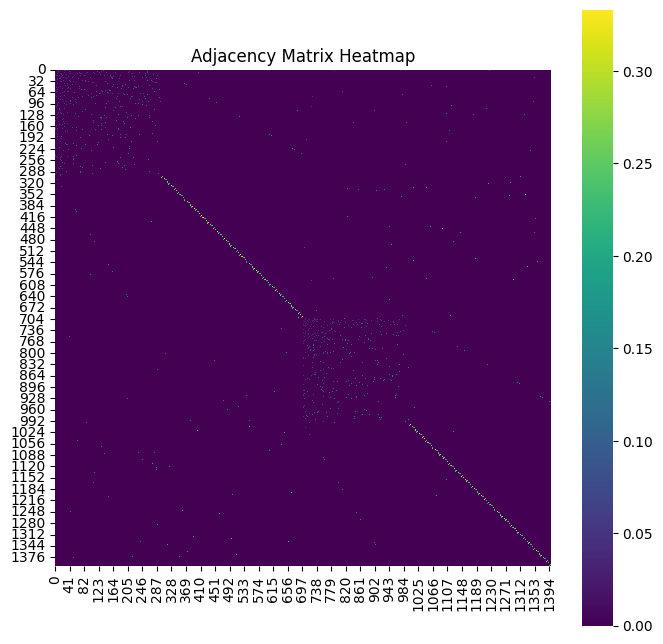

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np
%matplotlib inline

# adjacency matrices for Cora
A = to_dense_adj(data.edge_index, max_num_nodes = data.x.shape[0])[0]
A_tilde = A + torch.eye(A.shape[0])
D_tilde = torch.diag(torch.sum(A_tilde, axis=1))
D_tilde_inv_sqrt = torch.pow(D_tilde, -0.5)
D_tilde_inv_sqrt[torch.isinf(D_tilde_inv_sqrt)] = 0.0
A_tilde = A_tilde.to_sparse()
D_tilde_inv_sqrt = D_tilde_inv_sqrt.to_sparse()
adj_norm = torch.sparse.mm(torch.sparse.mm(D_tilde_inv_sqrt, A_tilde), D_tilde_inv_sqrt) # degree-normalised adjacency
L = torch.eye(adj_norm.shape[0]) - adj_norm  # graph laplacian

plt.figure(figsize=(8, 8))
sns.heatmap(np.array(adj_norm.to_dense().numpy()), cmap='viridis', square=True)
plt.title('Adjacency Matrix Heatmap')
plt.show()

In [19]:
# PyG example code: https://github.com/pyg-team/pytorch_geometric/blob/master/examples/gcn2_cora.py

class GNNModel(Module):

    def __init__(
            self,
            in_dim: int = data.x.shape[-1],
            hidden_dim: int = 128,
            num_heads: int = 1,
            num_layers: int = 1,
            out_dim: int = len(data.y.unique()),
            dropout: float = 0.5,
        ):
        super().__init__()

        self.lin_in = Linear(in_dim, hidden_dim)
        self.lin_out = Linear(hidden_dim, out_dim)

        self.layers = ModuleList()
        for layer in range(num_layers):
            self.layers.append(
                # GCNConv(hidden_dim, hidden_dim)
                GATConv(hidden_dim, hidden_dim // num_heads, num_heads)
            )
        self.dropout = dropout

    def forward(self, x, edge_index):

        x = self.lin_in(x)

        for layer in self.layers:
            # conv -> activation ->  dropout -> residual
            x_in = x
            x = layer(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, self.dropout, training=self.training)
            x = x_in + x

        x = self.lin_out(x)

        return x.log_softmax(dim=-1)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GNNModel().to(device)

data = data.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return float(loss)


@torch.no_grad()
def test():
    model.eval()
    pred, accs = model(data.x, data.edge_index).argmax(dim=-1), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        accs.append(int((pred[mask] == data.y[mask]).sum()) / int(mask.sum()))
    return accs


best_val_acc = test_acc = 0
times = []
for epoch in range(1, 100):
    start = time.time()
    loss = train()
    train_acc, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    print(f'Epoch: {epoch:04d}, Loss: {loss:.4f} Train: {train_acc:.4f}, '
          f'Val: {val_acc:.4f}, Test: {tmp_test_acc:.4f}, '
          f'Final Test: {test_acc:.4f}')
    times.append(time.time() - start)
print(f"Median time per epoch: {torch.tensor(times).median():.4f}s")

Epoch: 0001, Loss: 2.1072 Train: 0.2298, Val: 0.2524, Test: 0.2275, Final Test: 0.2275
Epoch: 0002, Loss: 2.0393 Train: 0.2768, Val: 0.3000, Test: 0.2559, Final Test: 0.2559
Epoch: 0003, Loss: 1.9584 Train: 0.3085, Val: 0.3190, Test: 0.2891, Final Test: 0.2891
Epoch: 0004, Loss: 1.9078 Train: 0.3473, Val: 0.3714, Test: 0.3128, Final Test: 0.3128
Epoch: 0005, Loss: 1.8429 Train: 0.3800, Val: 0.3857, Test: 0.3318, Final Test: 0.3318
Epoch: 0006, Loss: 1.7854 Train: 0.4065, Val: 0.4190, Test: 0.3744, Final Test: 0.3744
Epoch: 0007, Loss: 1.7465 Train: 0.4290, Val: 0.4381, Test: 0.3886, Final Test: 0.3886
Epoch: 0008, Loss: 1.6998 Train: 0.4443, Val: 0.4476, Test: 0.3744, Final Test: 0.3744
Epoch: 0009, Loss: 1.6548 Train: 0.4525, Val: 0.4476, Test: 0.3744, Final Test: 0.3744
Epoch: 0010, Loss: 1.6047 Train: 0.4607, Val: 0.4524, Test: 0.3839, Final Test: 0.3839
Epoch: 0011, Loss: 1.5865 Train: 0.4597, Val: 0.4762, Test: 0.3934, Final Test: 0.3934
Epoch: 0012, Loss: 1.5440 Train: 0.4566, Va

In [20]:
class SparseGraphTransformerModel(Module):
    def __init__(
            self,
            in_dim: int = data.x.shape[-1],
            hidden_dim: int = 128,
            num_heads: int = 1,
            num_layers: int = 1,
            out_dim: int = len(data.y.unique()),
            dropout: float = 0.5,
        ):
        super().__init__()

        self.lin_in = Linear(in_dim, hidden_dim)
        self.lin_out = Linear(hidden_dim, out_dim)

        self.layers = ModuleList()
        for layer in range(num_layers):
            self.layers.append(
                MultiheadAttention(
                    embed_dim = hidden_dim,
                    num_heads = num_heads,
                    dropout = dropout
                )
            )
        self.dropout = dropout

    def forward(self, x, dense_adj):

        x = self.lin_in(x)

        # TransformerEncoder
        # x = self.encoder(x, mask = ~dense_adj.bool())

        self.attn_weights_list = []

        for layer in self.layers:
            # # TransformerEncoderLayer
            # # boolean mask enforces graph structure
            # x = layer(x, src_mask = ~dense_adj.bool())

            # MHSA layer
            # boolean mask enforces graph structure
            x_in = x
            x, attn_weights = layer(
                x, x, x,
                attn_mask = ~dense_adj.bool(),
                average_attn_weights = False
            )
            x = F.relu(x)
            x = F.dropout(x, self.dropout, training=self.training)
            x = x_in + x

            self.attn_weights_list.append(attn_weights)

        x = self.lin_out(x)

        return x.log_softmax(dim=-1)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SparseGraphTransformerModel().to(device)

data.dense_adj = to_dense_adj(data.edge_index, max_num_nodes = data.x.shape[0])[0]
data = data.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.dense_adj)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return float(loss)


@torch.no_grad()
def test():
    model.eval()
    pred, accs = model(data.x, data.dense_adj).argmax(dim=-1), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        accs.append(int((pred[mask] == data.y[mask]).sum()) / int(mask.sum()))
    return accs


best_val_acc = test_acc = 0
times = []
for epoch in range(1, 100):
    start = time.time()
    loss = train()
    train_acc, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    print(f'Epoch: {epoch:04d}, Loss: {loss:.4f} Train: {train_acc:.4f}, '
          f'Val: {val_acc:.4f}, Test: {tmp_test_acc:.4f}, '
          f'Final Test: {test_acc:.4f}')
    times.append(time.time() - start)
print(f"Median time per epoch: {torch.tensor(times).median():.4f}s")

Epoch: 0001, Loss: 2.1013 Train: 0.1931, Val: 0.1905, Test: 0.1706, Final Test: 0.1706
Epoch: 0002, Loss: 2.0304 Train: 0.2492, Val: 0.2714, Test: 0.2180, Final Test: 0.2180
Epoch: 0003, Loss: 1.9657 Train: 0.3146, Val: 0.3190, Test: 0.2749, Final Test: 0.2749
Epoch: 0004, Loss: 1.8980 Train: 0.3739, Val: 0.3476, Test: 0.3175, Final Test: 0.3175
Epoch: 0005, Loss: 1.8346 Train: 0.3892, Val: 0.4048, Test: 0.3697, Final Test: 0.3697
Epoch: 0006, Loss: 1.7826 Train: 0.4147, Val: 0.4286, Test: 0.4028, Final Test: 0.4028
Epoch: 0007, Loss: 1.7404 Train: 0.4259, Val: 0.4524, Test: 0.4028, Final Test: 0.4028
Epoch: 0008, Loss: 1.6859 Train: 0.4372, Val: 0.4571, Test: 0.4028, Final Test: 0.4028
Epoch: 0009, Loss: 1.6542 Train: 0.4382, Val: 0.4619, Test: 0.3791, Final Test: 0.3791
Epoch: 0010, Loss: 1.6187 Train: 0.4372, Val: 0.4667, Test: 0.3744, Final Test: 0.3744
Epoch: 0011, Loss: 1.5746 Train: 0.4372, Val: 0.4571, Test: 0.3791, Final Test: 0.3744
Epoch: 0012, Loss: 1.5870 Train: 0.4362, Va

In [21]:
# The Shape of the Attention Matrix
model.attn_weights_list

[tensor[1, 1400, 1400] n=1960000 (7.5Mb) x∈[0., 1.000] μ=0.001 σ=0.019 cuda:0]

In [22]:
# Confirm that the Adjacency and the Attention Matrices have the same shape
ATTENTION_MATRIX = model.attn_weights_list[0].detach().cpu().numpy().squeeze()
ADJACENCY = data.dense_adj.cpu().numpy()
ADJACENCY, ATTENTION_MATRIX

(array([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0.0000000e+00, 2.8932031e-04, 2.2487037e-04, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [3.6543768e-02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [4.7861174e-02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         6.5354541e-02, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.5283873e-01,
         0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32))

In [23]:
### Thresholding by 0
treshold = 0.1
ATTENTION_MATRIX[ ATTENTION_MATRIX > treshold] = 1
ATTENTION_MATRIX[ ATTENTION_MATRIX <= treshold] = 0
ADJACENCY, ATTENTION_MATRIX

(array([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [24]:
ATTENTION_MATRIX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
### Node Degree Distribution
pd.DataFrame(pd.concat({'Attention':pd.DataFrame(ATTENTION_MATRIX.sum(axis=1)).value_counts(), 'Adjacency': pd.DataFrame(ADJACENCY.sum(axis=0)).value_counts()}, axis=1)).fillna(0)

,Attention,Adjacency
0,,
2.0,629.0,281.0
3.0,333.0,242.0
1.0,285.0,0.0
4.0,135.0,175.0
5.0,16.0,161.0
0.0,1.0,0.0
6.0,1.0,119.0
7.0,0.0,104.0
8.0,0.0,66.0


done
done


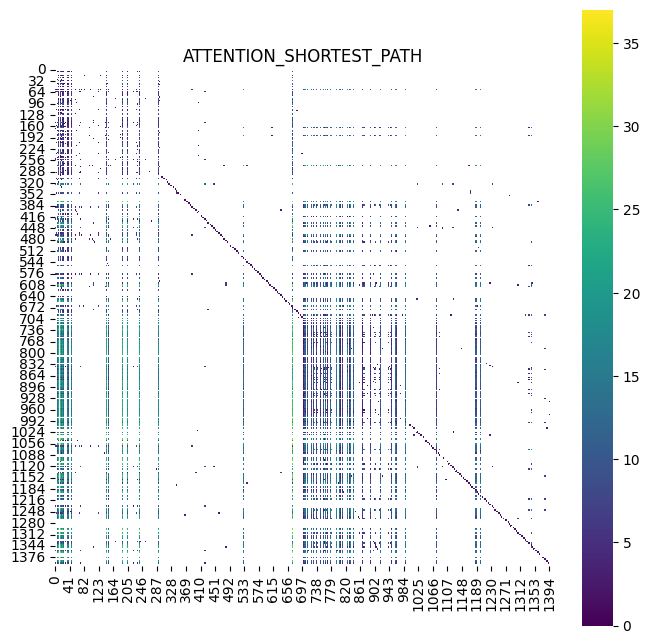

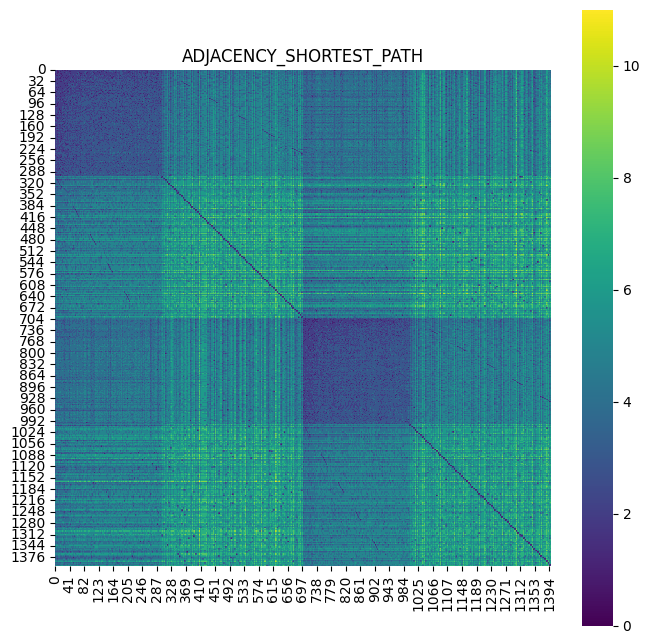

In [26]:
## Shortest Paths

def get_shortest_path_matrix(adjacency_matrix):
    # Convert the adjacency matrix to a NetworkX graph
    graph = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
    # Compute the shortest path matrix using Floyd-Warshall algorithm in NetworkX
    shortest_path_matrix = nx.floyd_warshall_numpy(graph)
    # Convert numpy array back to torch tensor
    shortest_path_matrix = torch.tensor(shortest_path_matrix).float()
    return shortest_path_matrix

ATTENTION_SHORTEST_PATH = get_shortest_path_matrix(ATTENTION_MATRIX)
print('done')
ADJACENCY_SHORTEST_PATH = get_shortest_path_matrix(ADJACENCY)
print('done')
ATTENTION_SHORTEST_PATH[ATTENTION_SHORTEST_PATH != np.inf].max(), ADJACENCY_SHORTEST_PATH[ADJACENCY_SHORTEST_PATH != np.inf].max()

plt.figure(figsize=(8, 8))
sns.heatmap(np.array(pd.DataFrame(ATTENTION_SHORTEST_PATH.numpy()).replace(np.inf, np.nan)), cmap='viridis', square=True)
plt.title('ATTENTION_SHORTEST_PATH')
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(np.array(pd.DataFrame(ADJACENCY_SHORTEST_PATH.numpy()).replace(np.inf, np.nan)), cmap='viridis', square=True)
plt.title('ADJACENCY_SHORTEST_PATH')
plt.show()

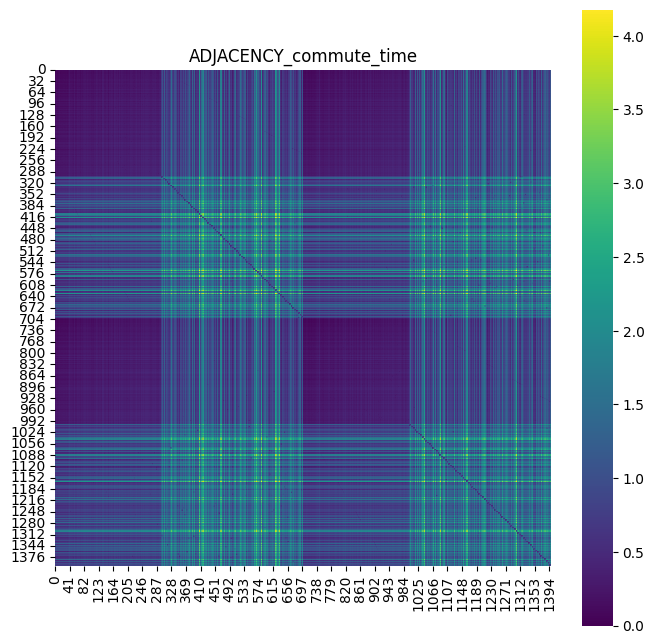

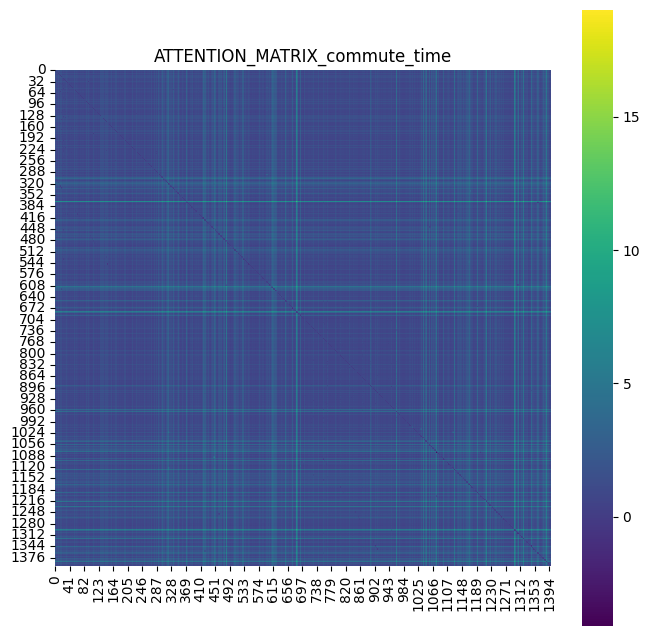

Attention 1.6190471068869405 1.1719293455474091 -4.106148719787598 19.007962927222252
Adjacency 1.046722083322267 0.6189523829669655 0.0 4.177328025922179


In [27]:
### Commute Times

# ref: https://math.stackexchange.com/questions/1321305/commute-time-distance-in-a-graph
import numpy as np
from scipy.linalg import pinv

def compute_commute_times(A):
    n = A.shape[0]  # Number of vertices
    D = np.diag(A.sum(axis=1))  # Degree matrix
    L = D - A  # Laplacian matrix
    L_pinv = pinv(L)  # Pseudoinverse of the Laplacian
    # V = np.sum(A) / 2  # Total number of edges, for undirected graph

    commute_times = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            commute_times[i, j] =(L_pinv[i, i] + L_pinv[j, j] - 2 * L_pinv[i, j]) # V * (L_pinv[i, i] + L_pinv[j, j] - 2 * L_pinv[i, j])

    return commute_times

ADJACENCY_commute_time = compute_commute_times(ADJACENCY)
ATTENTION_MATRIX_commute_time = compute_commute_times(ATTENTION_MATRIX)

plt.figure(figsize=(8, 8))
sns.heatmap(ADJACENCY_commute_time, cmap='viridis', square=True)
plt.title('ADJACENCY_commute_time')
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(ATTENTION_MATRIX_commute_time, cmap='viridis', square=True)
plt.title('ATTENTION_MATRIX_commute_time')
plt.show()

print('Attention', ATTENTION_MATRIX_commute_time.mean(), ATTENTION_MATRIX_commute_time.std(), ATTENTION_MATRIX_commute_time.min(), ATTENTION_MATRIX_commute_time.max())
print('Adjacency',ADJACENCY_commute_time.mean(), ADJACENCY_commute_time.std(), ADJACENCY_commute_time.min(), ADJACENCY_commute_time.max())

In [28]:
### Topological substructures: Triangle Count

A = ATTENTION_MATRIX
A_cubed = np.linalg.matrix_power(A, 3)
print('Attention:', np.trace(A_cubed))

A = ADJACENCY
A_cubed = np.linalg.matrix_power(A, 3)
print('Adjacency:',np.trace(A_cubed))

Attention: 300.0
Adjacency: 7776.0


<ipython-input-29-8db14dd281c0>:8: RuntimeWarning: invalid value encountered in divide
  P = A / row_sums


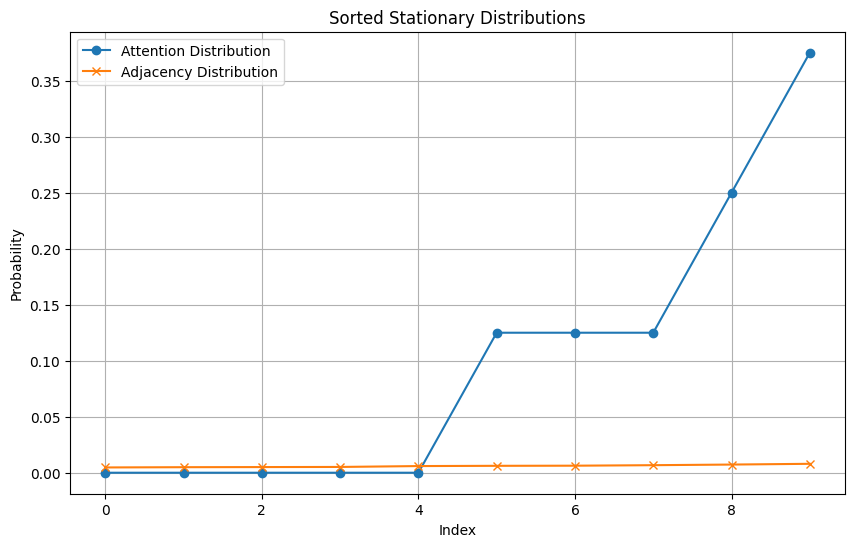

Attention 0.0007142857 0.013343957 -9.320039e-18 0.375
Adjacency 0.0007142857 0.0007524159 0.00022421518 0.0079596415


In [29]:
### Random Walk Statistics

import numpy as np

A = ATTENTION_MATRIX
# Convert to transition matrix P
row_sums = A.sum(axis=1, keepdims=True)
P = A / row_sums
P = np.nan_to_num(P)
# Calculate stationary distribution
# We solve (pi*P = pi) by finding the eigenvector of P.T corresponding to eigenvalue 1
eigenvalues, eigenvectors = np.linalg.eig(P.T)
pi_index = np.argmin(np.abs(eigenvalues - 1)) # Find index of eigenvalue closest to 1
# pi_index = np.argmax(np.abs(eigenvalues)) # Find index of eigenvalue closest to 1
stationary_distribution = np.real(eigenvectors[:, pi_index] / np.sum(eigenvectors[:, pi_index]))
stationary_distribution_attention = stationary_distribution

# Sample adjacency matrix
A = ADJACENCY
row_sums = A.sum(axis=1, keepdims=True)
P = A / row_sums
P = np.nan_to_num(P)
eigenvalues, eigenvectors = np.linalg.eig(P.T)
pi_index = np.argmin(np.abs(eigenvalues - 1)) # Find index of eigenvalue closest to 1
# pi_index = np.argmax(np.abs(eigenvalues)) # Find index of eigenvalue closest to 1
stationary_distribution = np.real(eigenvectors[:, pi_index] / np.sum(eigenvectors[:, pi_index]))
stationary_distribution_adjacency = stationary_distribution


y1 = np.sort(stationary_distribution_attention)
cutoff = len(y1)-10
y1 = np.sort(stationary_distribution_attention)[cutoff:]
y2 = np.sort(stationary_distribution_adjacency)[cutoff:]
x = np.array(range(len(y1)))
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Attention Distribution', marker='o')
plt.plot(x, y2, label='Adjacency Distribution', marker='x')
plt.title('Sorted Stationary Distributions')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

print('Attention', stationary_distribution_attention.mean(), stationary_distribution_attention.std(), stationary_distribution_attention.min(), stationary_distribution_attention.max())
print('Adjacency',stationary_distribution_adjacency.mean(), stationary_distribution_adjacency.std(), stationary_distribution_adjacency.min(), stationary_distribution_adjacency.max())

In [30]:
def get_shortest_path_matrix(adjacency_matrix):
    # Convert the adjacency matrix to a NetworkX graph
    graph = nx.from_numpy_array(adjacency_matrix.cpu().numpy(), create_using=nx.DiGraph)
    # Compute the shortest path matrix using Floyd-Warshall algorithm in NetworkX
    shortest_path_matrix = nx.floyd_warshall_numpy(graph)
    # Convert numpy array back to torch tensor
    shortest_path_matrix = torch.tensor(shortest_path_matrix).float()
    return shortest_path_matrix

dense_adj = to_dense_adj(data.edge_index, max_num_nodes = data.x.shape[0])[0]
dense_shortest_path_matrix = get_shortest_path_matrix(dense_adj)  # takes about 1-2 mins

In [31]:
class DenseGraphTransformerModel(Module):

    def __init__(
            self,
            in_dim: int = data.x.shape[-1],
            pos_enc_dim: int = 16,
            hidden_dim: int = 128,
            num_heads: int = 1,
            num_layers: int = 1,
            out_dim: int = len(data.y.unique()),
            dropout: float = 0.5,
        ):
        super().__init__()

        self.lin_in = Linear(in_dim, hidden_dim)
        self.lin_pos_enc = Linear(pos_enc_dim, hidden_dim)
        self.lin_out = Linear(hidden_dim, out_dim)

        self.layers = ModuleList()
        for layer in range(num_layers):
            self.layers.append(
                MultiheadAttention(
                    embed_dim = hidden_dim,
                    num_heads = num_heads,
                    dropout = dropout
                )
            )


        self.attn_bias_scale = torch.nn.Parameter(torch.tensor([10.0]))  # controls how much we initially bias our model to nearby nodes
        self.dropout = dropout

    def forward(self, x, pos_enc, dense_sp_matrix):

        # x = self.lin_in(x) + self.lin_pos_enc(pos_enc)
        x = self.lin_in(x)  # no node positional encoding

        # attention bias
        # [i, j] -> inverse of shortest path distance b/w node i and j
        # diagonals -> self connection, set to 0
        # disconnected nodes -> -1
        attn_bias = self.attn_bias_scale * torch.nan_to_num(
            (1 / (torch.nan_to_num(dense_sp_matrix, nan=-1, posinf=-1, neginf=-1))),
            nan=0, posinf=0, neginf=0
        )
        #attn_bias = torch.ones_like(attn_bias)

        # TransformerEncoder
        # x = self.encoder(x, mask = attn_bias)

        self.attn_weights_list = []

        for layer in self.layers:
            # # TransformerEncoderLayer
            # # float mask adds learnable additive attention bias
            # x = layer(x, src_mask = attn_bias)

            # MHSA layer
            # float mask adds learnable additive attention bias
            x_in = x
            x, attn_weights = layer(
                x, x, x,
                attn_mask = attn_bias,
                average_attn_weights = False
            )
            x = F.relu(x)
            x = F.dropout(x, self.dropout, training=self.training)
            x = x_in + x

            self.attn_weights_list.append(attn_weights)

        x = self.lin_out(x)

        return x.log_softmax(dim=-1)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = DenseGraphTransformerModel().to(device)

data = T.AddLaplacianEigenvectorPE(k = 16, attr_name = 'pos_enc')(data)
# data = T.AddRandomWalkPE(walk_length = 16, attr_name = 'pos_enc')(data)
data.dense_adj = to_dense_adj(data.edge_index, max_num_nodes = data.x.shape[0])[0]
data.dense_sp_matrix = dense_shortest_path_matrix.float()  # pre-computed in previous cell
data = data.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.pos_enc, data.dense_sp_matrix)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return float(loss)


@torch.no_grad()
def test():
    model.eval()
    pred, accs = model(data.x, data.pos_enc, data.dense_sp_matrix).argmax(dim=-1), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        accs.append(int((pred[mask] == data.y[mask]).sum()) / int(mask.sum()))
    return accs


best_val_acc = test_acc = 0
times = []
for epoch in range(1, 100):
    start = time.time()
    loss = train()
    train_acc, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    print(f'Epoch: {epoch:04d}, Loss: {loss:.4f} Train: {train_acc:.4f}, '
          f'Val: {val_acc:.4f}, Test: {tmp_test_acc:.4f}, '
          f'Final Test: {test_acc:.4f}')
    times.append(time.time() - start)
print(f"Median time per epoch: {torch.tensor(times).median():.4f}s")

# Notes
# - Dense Transformer needs to be trained for a bit longer to reach low loss value
# - Node positional encodings are not particularly useful
# - Edge distance encodings are very useful
# - Since Cora is highly homophilic, it is important to bias the attention towards nearby nodes

Epoch: 0001, Loss: 2.1997 Train: 0.1614, Val: 0.1429, Test: 0.1422, Final Test: 0.1422
Epoch: 0002, Loss: 2.1231 Train: 0.2063, Val: 0.1714, Test: 0.1896, Final Test: 0.1896
Epoch: 0003, Loss: 2.0541 Train: 0.2462, Val: 0.2238, Test: 0.2370, Final Test: 0.2370
Epoch: 0004, Loss: 1.9826 Train: 0.2860, Val: 0.2905, Test: 0.2607, Final Test: 0.2607
Epoch: 0005, Loss: 1.9193 Train: 0.3166, Val: 0.3190, Test: 0.2654, Final Test: 0.2654
Epoch: 0006, Loss: 1.8602 Train: 0.3473, Val: 0.3571, Test: 0.3081, Final Test: 0.3081
Epoch: 0007, Loss: 1.7910 Train: 0.3698, Val: 0.3714, Test: 0.3175, Final Test: 0.3175
Epoch: 0008, Loss: 1.7451 Train: 0.3820, Val: 0.3762, Test: 0.3460, Final Test: 0.3460
Epoch: 0009, Loss: 1.6839 Train: 0.4055, Val: 0.4333, Test: 0.3507, Final Test: 0.3507
Epoch: 0010, Loss: 1.6254 Train: 0.4249, Val: 0.4524, Test: 0.3412, Final Test: 0.3412
Epoch: 0011, Loss: 1.6023 Train: 0.4392, Val: 0.4476, Test: 0.3649, Final Test: 0.3412
Epoch: 0012, Loss: 1.5870 Train: 0.4372, Va

In [32]:
# The Shape of the Attention Matrix
model.attn_weights_list

[tensor[1, 1400, 1400] n=1960000 (7.5Mb) x∈[1.387e-11, 0.958] μ=0.001 σ=0.015 cuda:0]

In [33]:
# Confirm that the Adjacency and the Attention Matrices have the same shape
ATTENTION_MATRIX = model.attn_weights_list[0].detach().cpu().numpy().squeeze()
ADJACENCY = data.dense_adj.cpu().numpy()
ADJACENCY, ATTENTION_MATRIX

(array([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[3.0038329e-06, 2.5513011e-03, 1.0150030e-03, ..., 8.5132024e-06,
         4.9303979e-09, 1.1737271e-08],
        [4.6284869e-02, 9.8533143e-08, 3.3225333e-05, ..., 5.4483691e-05,
         1.6266996e-07, 3.8266199e-07],
        [3.0691456e-02, 8.9177674e-06, 6.2349483e-07, ..., 9.9476412e-05,
         6.4249394e-07, 8.0575464e-06],
        ...,
        [3.9383586e-04, 2.1305195e-05, 1.5537786e-04, ..., 8.8298824e-05,
         8.2504392e-02, 1.1112179e-02],
        [6.2040194e-06, 4.2157908e-06, 2.8989924e-05, ..., 6.1945933e-01,
         3.6731231e-05, 2.3885690e-02],
        [8.4641692e-07, 6.8139076e-07, 3.0205247e-06, ..., 1.0157377e-03,
         8.4101752e-04, 1.7160510e-04]], dtype=float32))

In [34]:
# The symmetry of the Attention Matrix: We find that the Attention Matrix is Not Symmetric because of Softmax Normalization (?)
ATTENTION_MATRIX.sum(axis=0), ATTENTION_MATRIX.sum(axis=1)

(array([14.92855   ,  1.0897309 ,  0.5736286 , ...,  1.4542607 ,
         0.14336754,  1.5181253 ], dtype=float32),
 array([1.0000001, 0.9999998, 1.       , ..., 0.9999999, 1.0000001,
        1.       ], dtype=float32))

In [35]:
### Node Degree Distribution - Before Tresholding (Probabilistic?)
pd.DataFrame(pd.concat({'Attention':pd.DataFrame(ATTENTION_MATRIX.sum(axis=1)).value_counts(), 'Adjacency': pd.DataFrame(ADJACENCY.sum(axis=0)).value_counts()}, axis=1)).fillna(0)

,Attention,Adjacency
0,,
1.0,462.0,0.0
1.0,318.0,0.0
1.0,215.0,0.0
1.0,178.0,0.0
1.0,85.0,0.0
1.0,81.0,0.0
1.0,35.0,0.0
1.0,12.0,0.0
1.0,6.0,0.0


In [36]:
### Thresholding by 0
treshold = 0.1
ATTENTION_MATRIX[ ATTENTION_MATRIX > treshold] = 1
ATTENTION_MATRIX[ ATTENTION_MATRIX <= treshold] = 0

In [37]:
### Node Degree Distribution
pd.DataFrame(pd.concat({'Attention':pd.DataFrame(ATTENTION_MATRIX.sum(axis=1)).value_counts(), 'Adjacency': pd.DataFrame(ADJACENCY.sum(axis=0)).value_counts()}, axis=1)).fillna(0)

,Attention,Adjacency
0,,
2.0,675.0,281.0
3.0,360.0,242.0
1.0,250.0,0.0
4.0,101.0,175.0
5.0,12.0,161.0
0.0,2.0,0.0
6.0,0.0,119.0
7.0,0.0,104.0
8.0,0.0,66.0


done
done


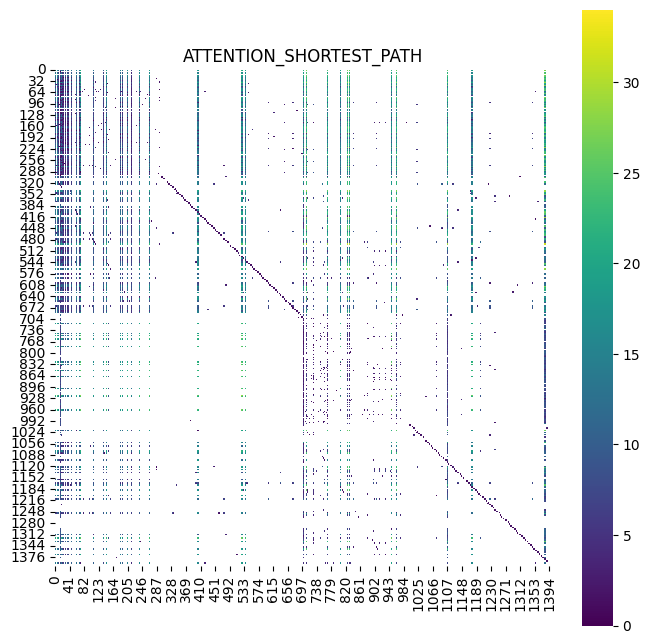

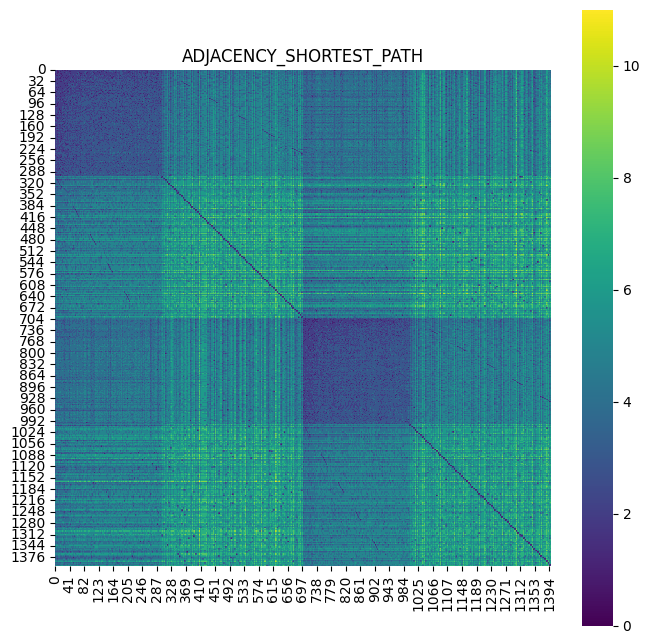

In [38]:
## Shortest Paths

def get_shortest_path_matrix(adjacency_matrix):
    # Convert the adjacency matrix to a NetworkX graph
    graph = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
    # Compute the shortest path matrix using Floyd-Warshall algorithm in NetworkX
    shortest_path_matrix = nx.floyd_warshall_numpy(graph)
    # Convert numpy array back to torch tensor
    shortest_path_matrix = torch.tensor(shortest_path_matrix).float()
    return shortest_path_matrix

ATTENTION_SHORTEST_PATH = get_shortest_path_matrix(ATTENTION_MATRIX)
print('done')
ADJACENCY_SHORTEST_PATH = get_shortest_path_matrix(ADJACENCY)
print('done')
ATTENTION_SHORTEST_PATH[ATTENTION_SHORTEST_PATH != np.inf].max(), ADJACENCY_SHORTEST_PATH[ADJACENCY_SHORTEST_PATH != np.inf].max()

plt.figure(figsize=(8, 8))
sns.heatmap(np.array(pd.DataFrame(ATTENTION_SHORTEST_PATH.numpy()).replace(np.inf, np.nan)), cmap='viridis', square=True)
plt.title('ATTENTION_SHORTEST_PATH')
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(np.array(pd.DataFrame(ADJACENCY_SHORTEST_PATH.numpy()).replace(np.inf, np.nan)), cmap='viridis', square=True)
plt.title('ADJACENCY_SHORTEST_PATH')
plt.show()

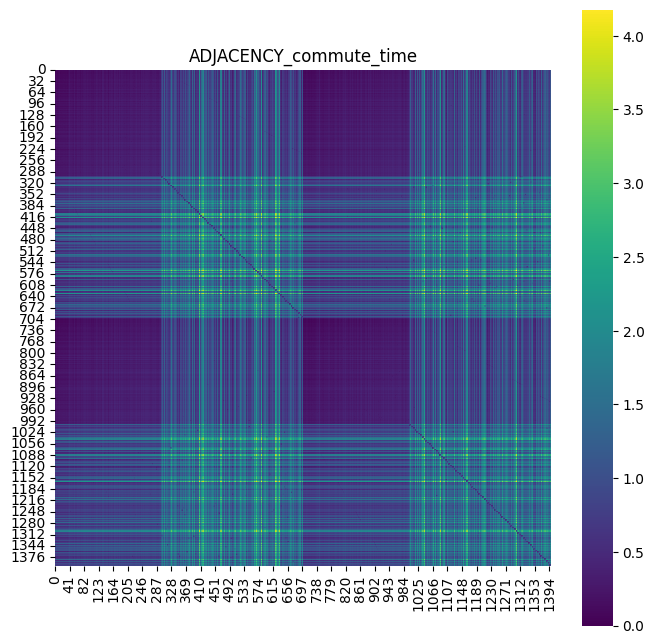

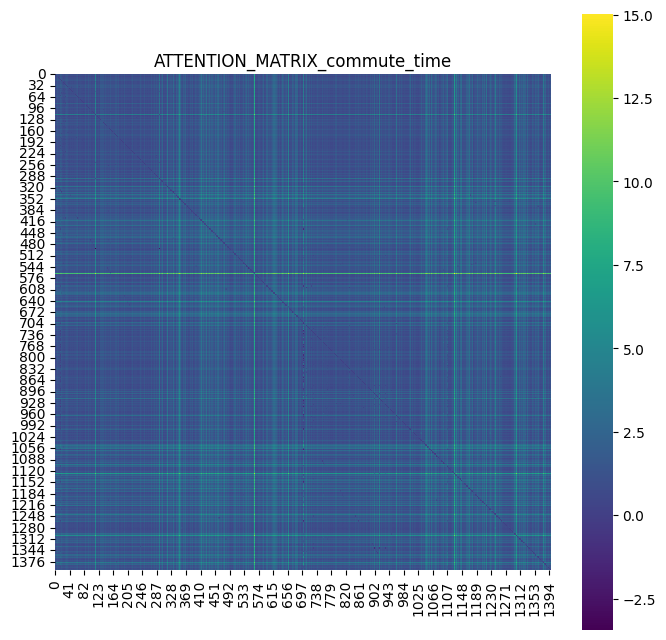

Attention 1.7422915017320397 1.1177641527624838 -3.4439830780029297 15.01944886893034
Adjacency 1.046722083322267 0.6189523829669655 0.0 4.177328025922179


In [39]:
### Commute Times

# ref: https://math.stackexchange.com/questions/1321305/commute-time-distance-in-a-graph
import numpy as np
from scipy.linalg import pinv

def compute_commute_times(A):
    n = A.shape[0]  # Number of vertices
    D = np.diag(A.sum(axis=1))  # Degree matrix
    L = D - A  # Laplacian matrix
    L_pinv = pinv(L)  # Pseudoinverse of the Laplacian
    # V = np.sum(A) / 2  # Total number of edges, for undirected graph

    commute_times = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            commute_times[i, j] =(L_pinv[i, i] + L_pinv[j, j] - 2 * L_pinv[i, j]) # V * (L_pinv[i, i] + L_pinv[j, j] - 2 * L_pinv[i, j])

    return commute_times

ADJACENCY_commute_time = compute_commute_times(ADJACENCY)
ATTENTION_MATRIX_commute_time = compute_commute_times(ATTENTION_MATRIX)

plt.figure(figsize=(8, 8))
sns.heatmap(ADJACENCY_commute_time, cmap='viridis', square=True)
plt.title('ADJACENCY_commute_time')
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(ATTENTION_MATRIX_commute_time, cmap='viridis', square=True)
plt.title('ATTENTION_MATRIX_commute_time')
plt.show()

print('Attention', ATTENTION_MATRIX_commute_time.mean(), ATTENTION_MATRIX_commute_time.std(), ATTENTION_MATRIX_commute_time.min(), ATTENTION_MATRIX_commute_time.max())
print('Adjacency',ADJACENCY_commute_time.mean(), ADJACENCY_commute_time.std(), ADJACENCY_commute_time.min(), ADJACENCY_commute_time.max())

In [40]:
### Topological substructures: Triangle Count

A = ATTENTION_MATRIX
A_cubed = np.linalg.matrix_power(A, 3)
print('Attention:', np.trace(A_cubed))

A = ADJACENCY
A_cubed = np.linalg.matrix_power(A, 3)
print('Adjacency:',np.trace(A_cubed))

Attention: 369.0
Adjacency: 7776.0


<ipython-input-41-f2f0b9100168>:8: RuntimeWarning: invalid value encountered in divide
  P = A / row_sums


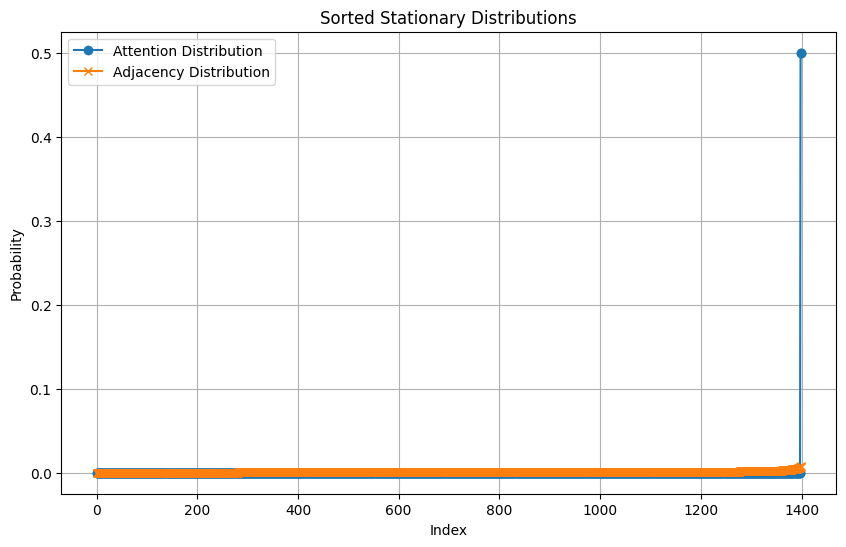

Attention 0.00071428565 0.018884718 -1.0183048e-15 0.49999997
Adjacency 0.0007142857 0.0007524159 0.00022421518 0.0079596415


In [41]:
### Random Walk Statistics

import numpy as np

A = ATTENTION_MATRIX
# Convert to transition matrix P
row_sums = A.sum(axis=1, keepdims=True)
P = A / row_sums
P = np.nan_to_num(P)
# Calculate stationary distribution
# We solve (pi*P = pi) by finding the eigenvector of P.T corresponding to eigenvalue 1
eigenvalues, eigenvectors = np.linalg.eig(P.T)
pi_index = np.argmin(np.abs(eigenvalues - 1)) # Find index of eigenvalue closest to 1
# pi_index = np.argmax(np.abs(eigenvalues)) # Find index of eigenvalue closest to 1
stationary_distribution = np.real(eigenvectors[:, pi_index] / np.sum(eigenvectors[:, pi_index]))
stationary_distribution_attention = stationary_distribution

# Sample adjacency matrix
A = ADJACENCY
row_sums = A.sum(axis=1, keepdims=True)
P = A / row_sums
P = np.nan_to_num(P)
eigenvalues, eigenvectors = np.linalg.eig(P.T)
pi_index = np.argmin(np.abs(eigenvalues - 1)) # Find index of eigenvalue closest to 1
# pi_index = np.argmax(np.abs(eigenvalues)) # Find index of eigenvalue closest to 1
stationary_distribution = np.real(eigenvectors[:, pi_index] / np.sum(eigenvectors[:, pi_index]))
stationary_distribution_adjacency = stationary_distribution

cutoff = len(y1) - 10
y1 = np.sort(stationary_distribution_attention)[cutoff:]
y2 = np.sort(stationary_distribution_adjacency)[cutoff:]
x = np.array(range(len(y1)))
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Attention Distribution', marker='o')
plt.plot(x, y2, label='Adjacency Distribution', marker='x')
plt.title('Sorted Stationary Distributions')
plt.xlabel('Index')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

print('Attention', stationary_distribution_attention.mean(), stationary_distribution_attention.std(), stationary_distribution_attention.min(), stationary_distribution_attention.max())
print('Adjacency',stationary_distribution_adjacency.mean(), stationary_distribution_adjacency.std(), stationary_distribution_adjacency.min(), stationary_distribution_adjacency.max())